<a href="https://colab.research.google.com/github/mrgodata/Genome/blob/main/upto_genomeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

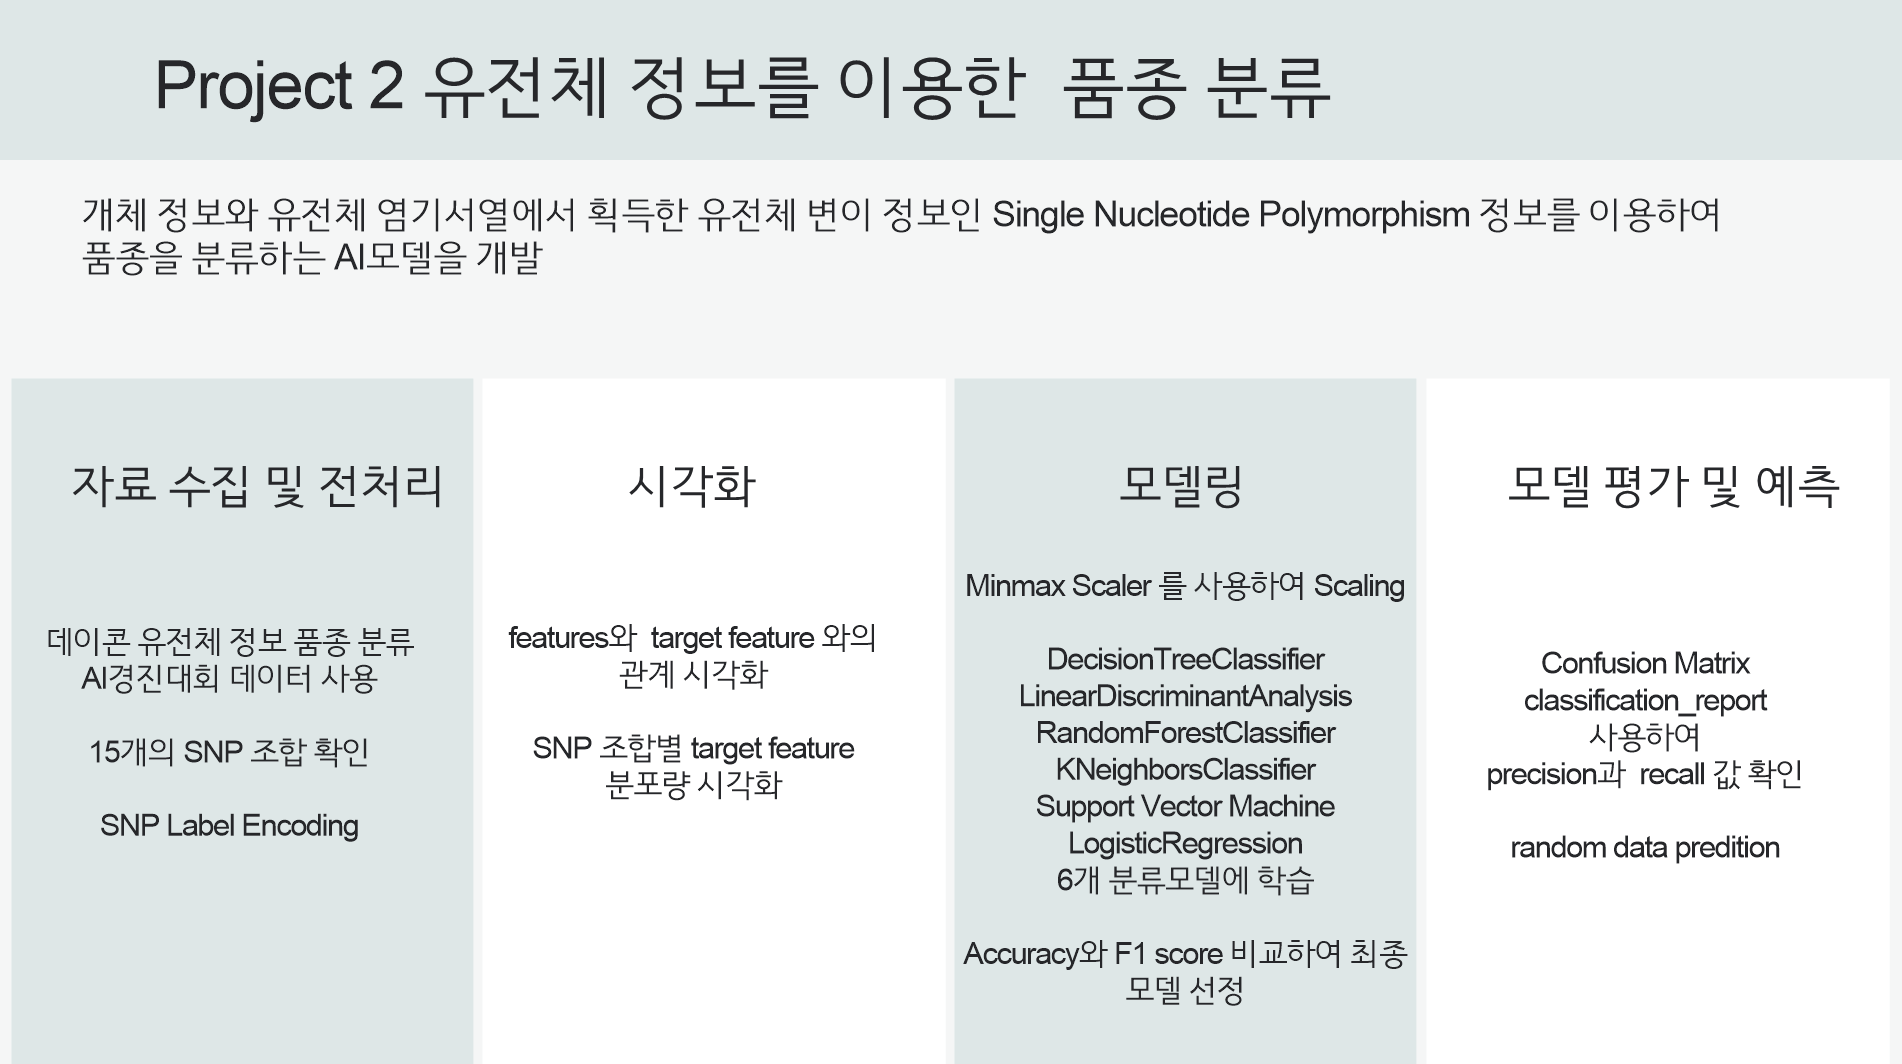

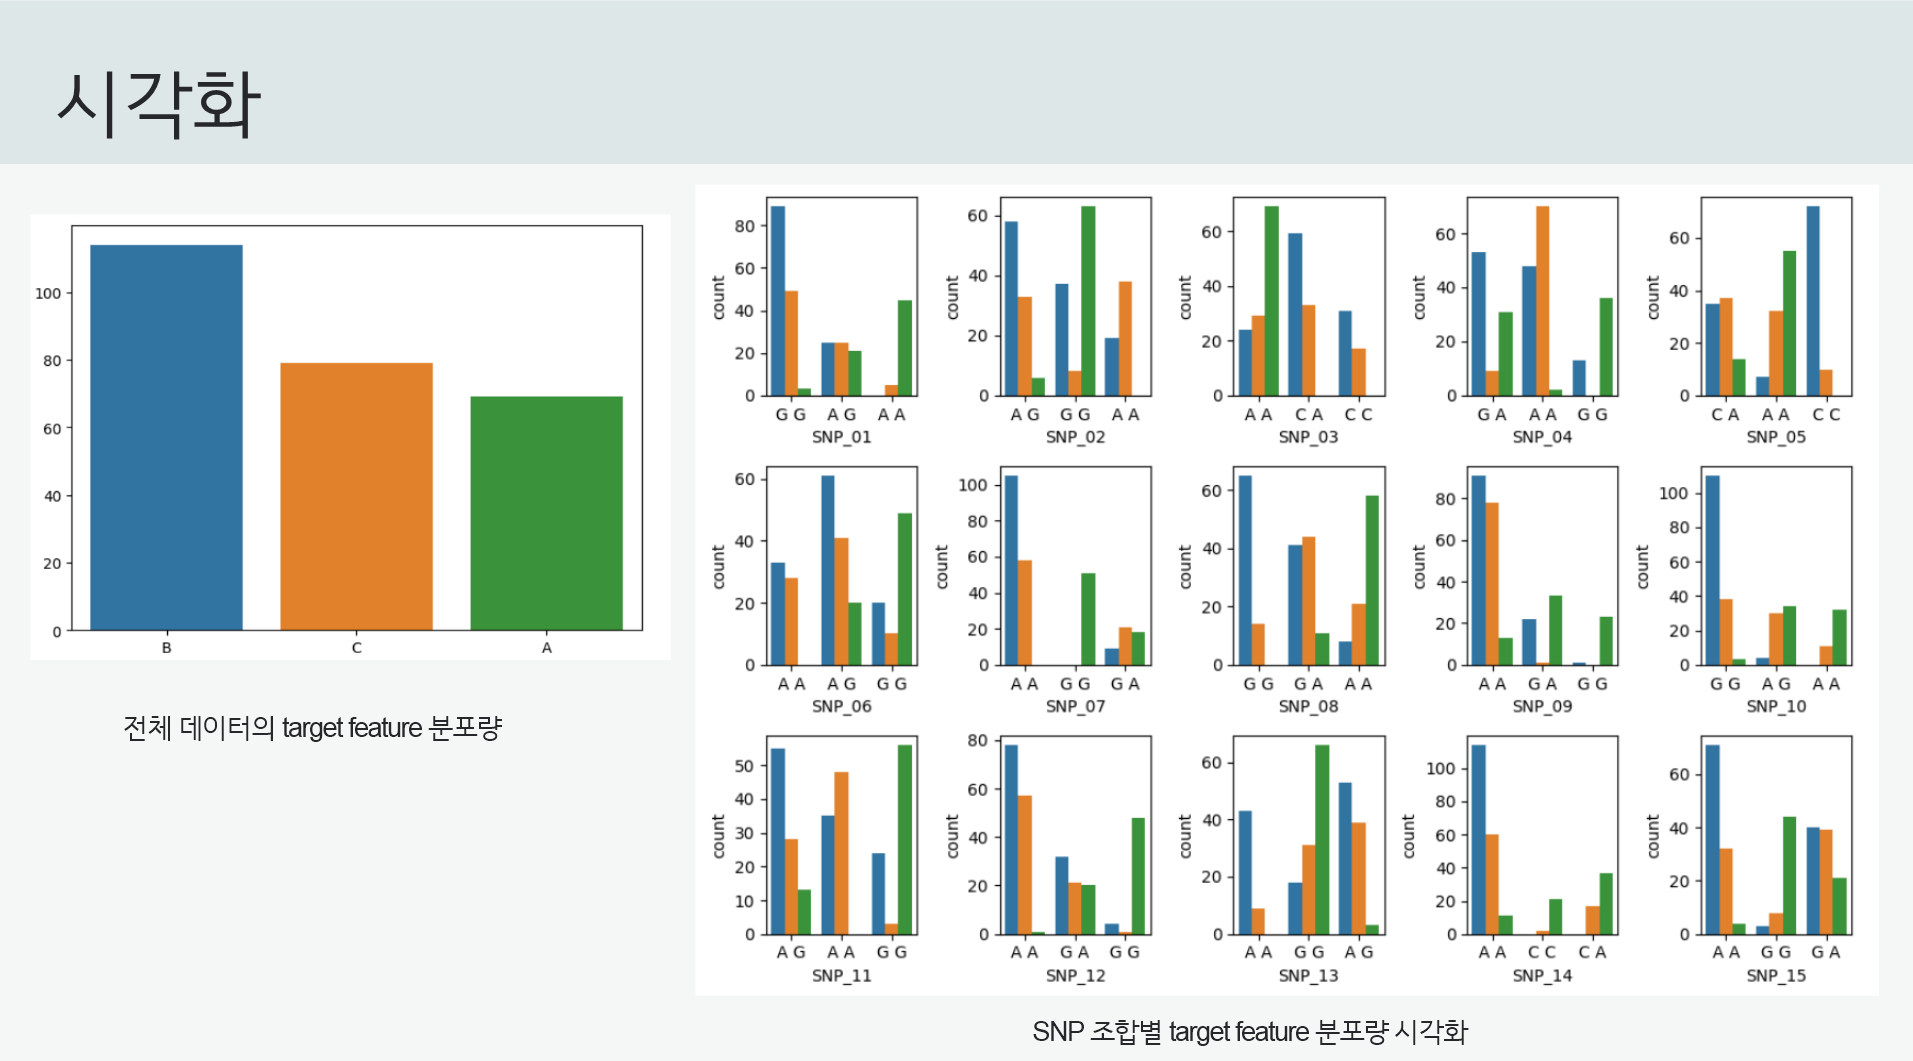

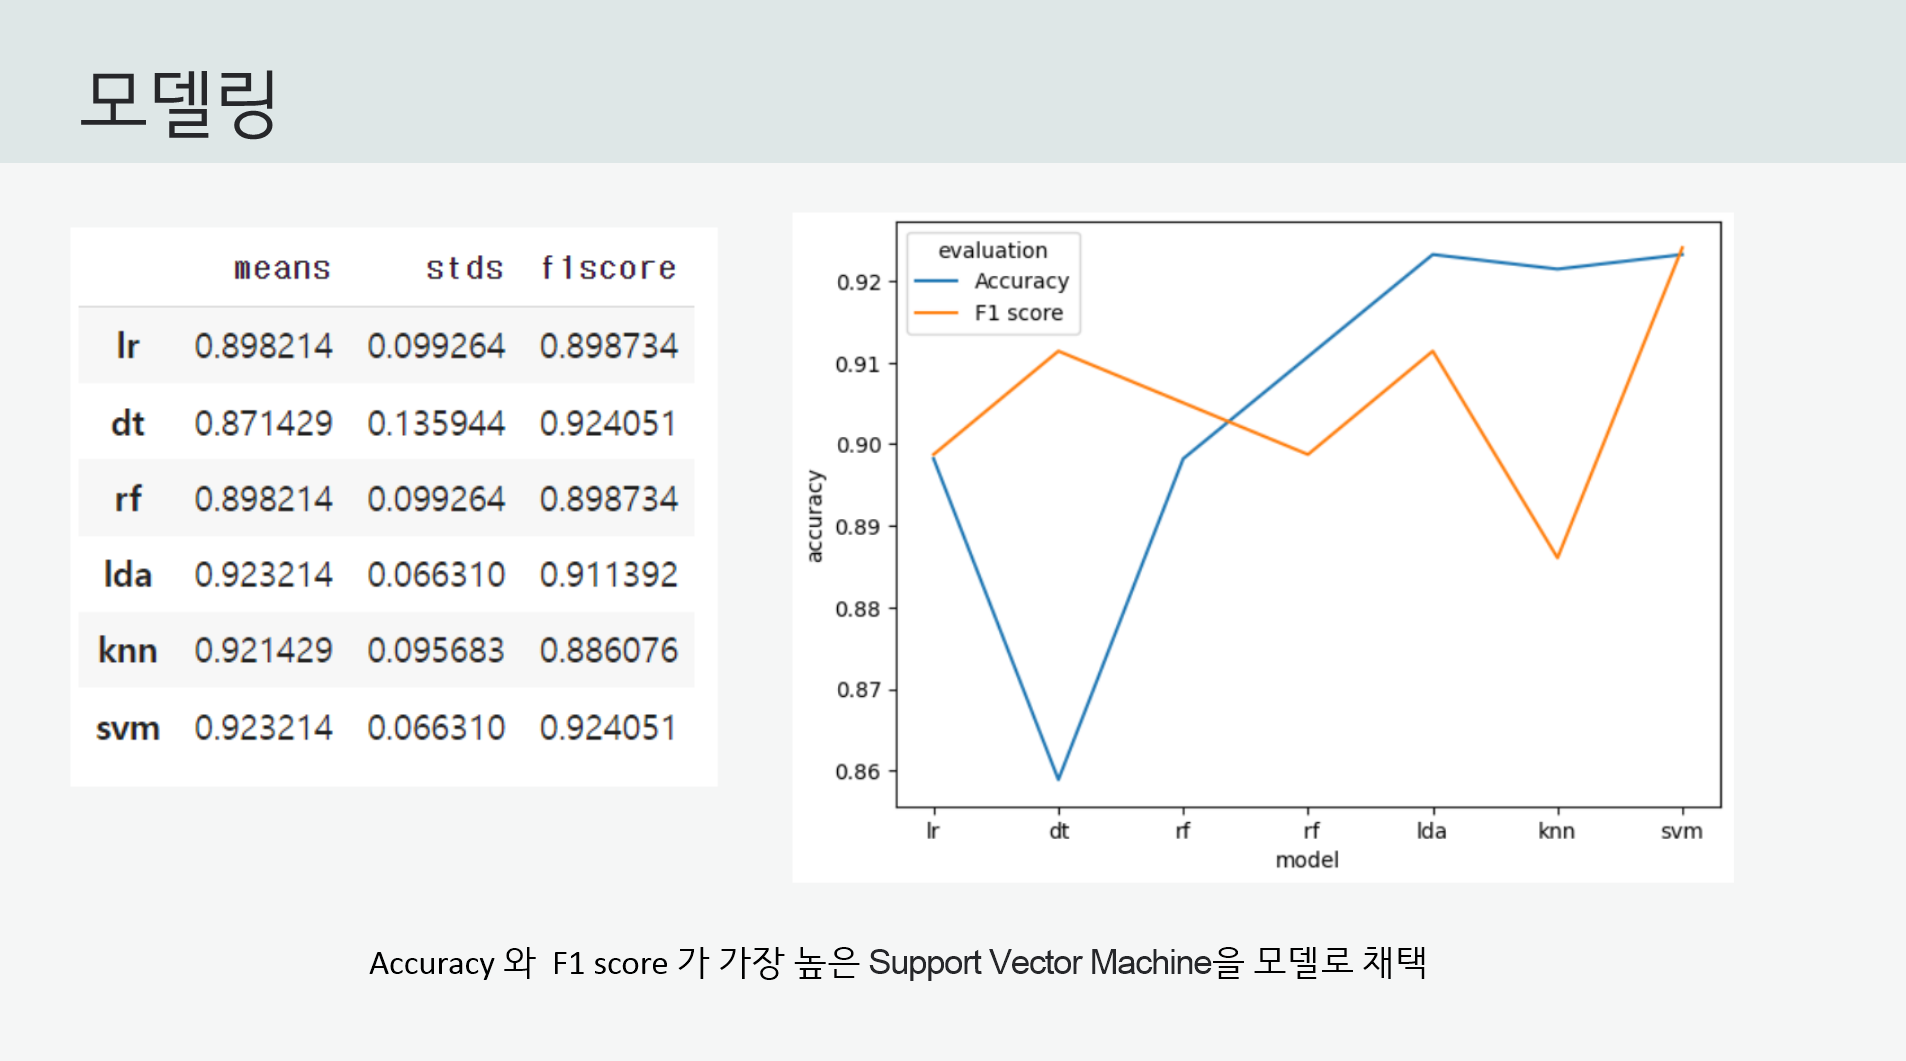

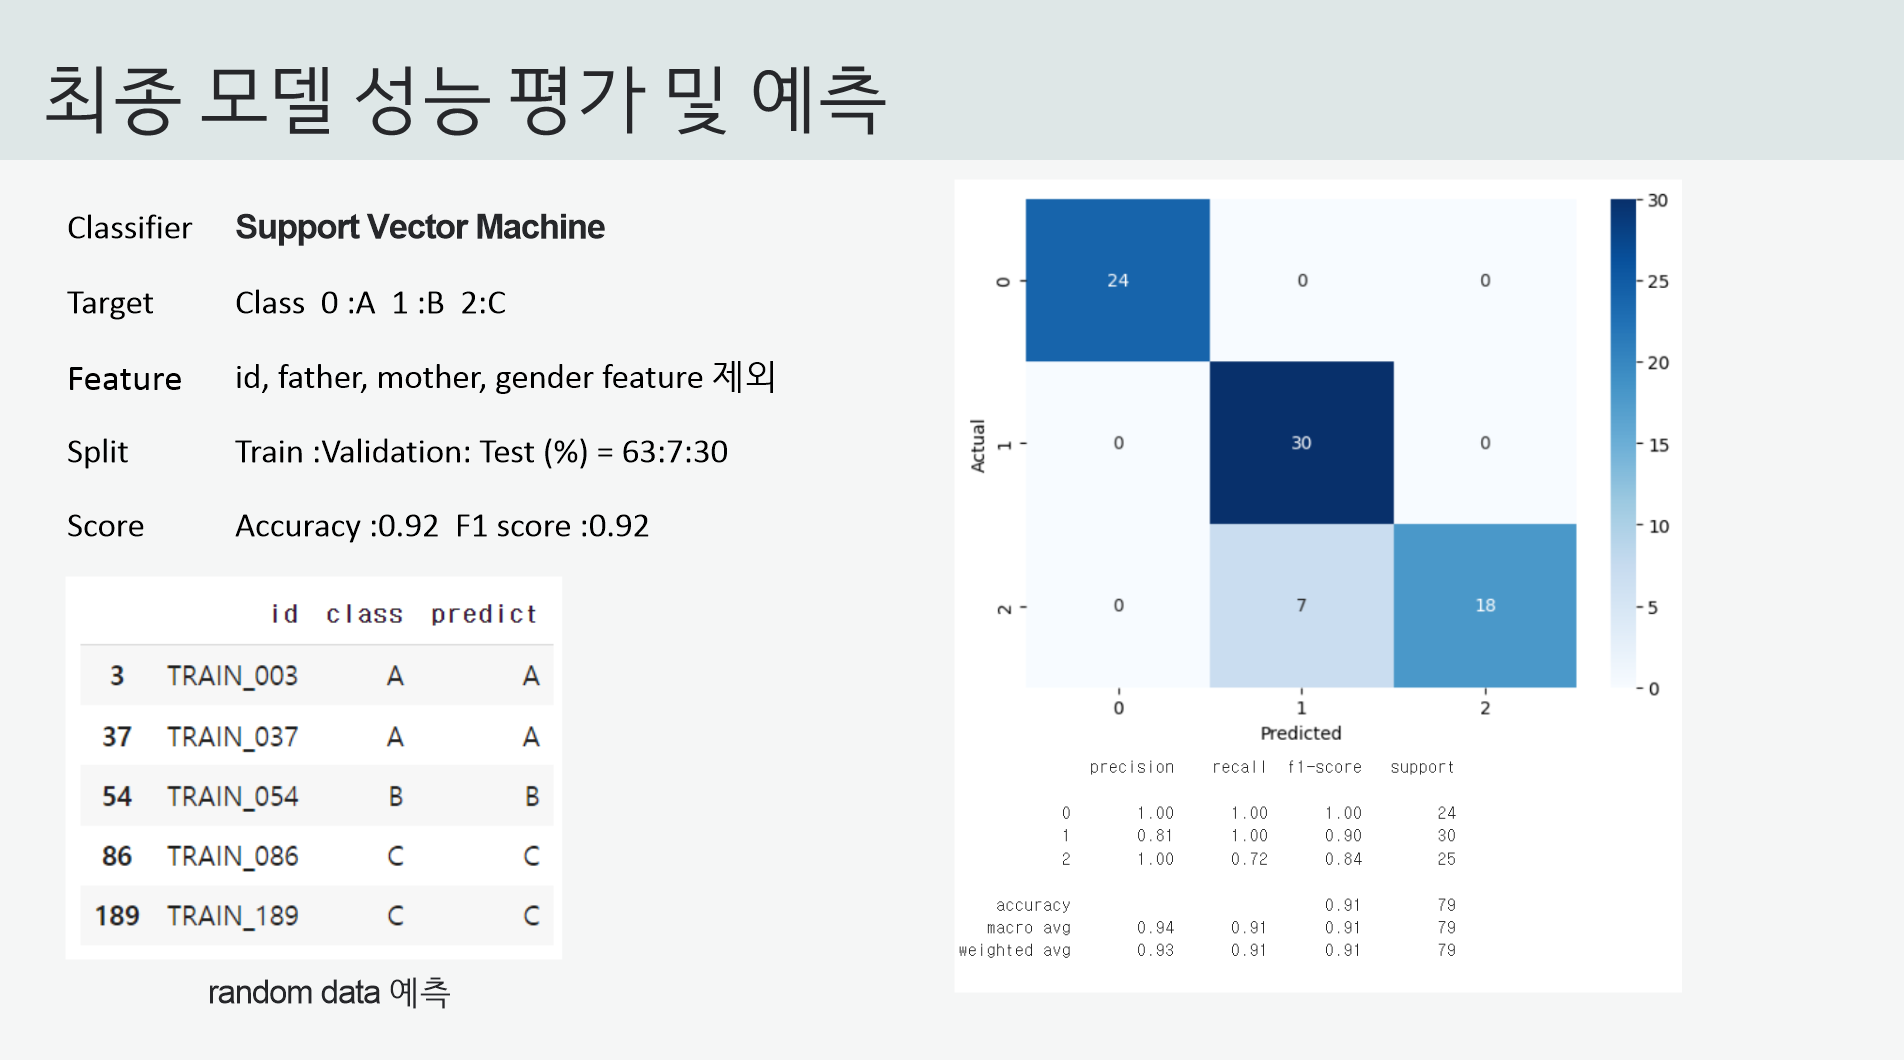

In [ ]:
import pandas as pd
import random
#import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# EDA 및 전처리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/개인프로젝트/projectdata/유전체 정보 품종 분류 AI 경진대회/train.csv')
#test = pd.read_csv('./test.csv')
#https://dacon.io/competitions/official/236035/codeshare/7547?page=1&dtype=recent

In [ ]:
df.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


## father, mother, gender features : 모두 unknown 이므로 drop

In [ ]:
#father, mother, gender feature는 모두 unknown으로 같은 값을 갖기 때문에 모델학습시 drop해준다
df['father'].value_counts() #0
df['mother'].value_counts() #0
df['gender'].value_counts() #0
df['gender'].unique()
df['trait'].value_counts()

2    193
1     69
Name: trait, dtype: int64

In [ ]:
#df_train.columns[df_train.columns.str.contains('SNP')]
#df_train['SNP_01'].unique() #value 종류 리스트
#value_counts()는 많은 순 unique()는 알파벳순(다시확인)
df['SNP_01'].value_counts().index #같은 의미(sort기준이 다름-unique이름순 다시확인)
df['SNP_01'].unique()

array(['G G', 'A G', 'A A'], dtype=object)

In [ ]:
df['SNP_01'].unique()

array(['G G', 'A G', 'A A'], dtype=object)

In [ ]:
for s in df.columns[5:-1]:
  print(f'{s}의 염기서열 : {df[s].unique()}')

SNP_01의 염기서열 : ['G G' 'A G' 'A A']
SNP_02의 염기서열 : ['A G' 'G G' 'A A']
SNP_03의 염기서열 : ['A A' 'C A' 'C C']
SNP_04의 염기서열 : ['G A' 'A A' 'G G']
SNP_05의 염기서열 : ['C A' 'A A' 'C C']
SNP_06의 염기서열 : ['A A' 'A G' 'G G']
SNP_07의 염기서열 : ['A A' 'G G' 'G A']
SNP_08의 염기서열 : ['G G' 'G A' 'A A']
SNP_09의 염기서열 : ['A A' 'G A' 'G G']
SNP_10의 염기서열 : ['G G' 'A G' 'A A']
SNP_11의 염기서열 : ['A G' 'A A' 'G G']
SNP_12의 염기서열 : ['A A' 'G A' 'G G']
SNP_13의 염기서열 : ['A A' 'G G' 'A G']
SNP_14의 염기서열 : ['A A' 'C C' 'C A']
SNP_15의 염기서열 : ['A A' 'G G' 'G A']


## 총 3가지 조합이 존재함을 확인
- (GG, AG, AA) = SNP_01, 02, 06, 10, 11, 13

- (AA, CC, CA) = SNP_03, 05, 14

- (GG, AA, GA) = SNP_04, 07, 08, 09, 12, 15



# 시각화

In [ ]:
# class분포 정도 확인->리샘플링
df['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

<Axes: >

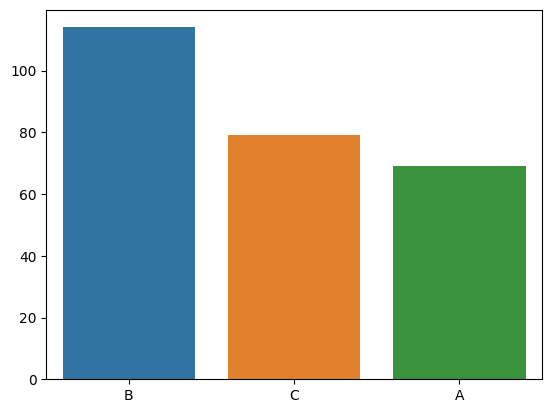

In [ ]:
sns.barplot(x=df['class'].value_counts().index,y=df['class'].value_counts().values)

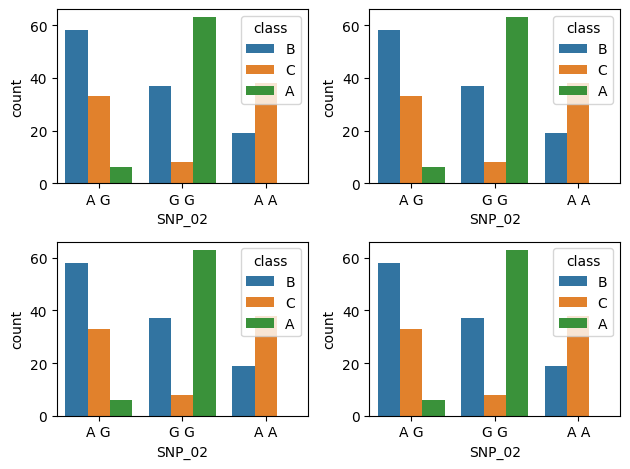

In [ ]:
fig = plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
sns.countplot(df,x=df['SNP_02'], hue=df['class'])
axes2 = fig.add_subplot(2, 2, 2)
sns.countplot(df,x=df['SNP_02'], hue=df['class'])
axes3 = fig.add_subplot(2, 2, 3)
sns.countplot(df,x=df['SNP_02'], hue=df['class'])
axes4 = fig.add_subplot(2, 2, 4)
sns.countplot(df,x=df['SNP_02'], hue=df['class'])
fig.tight_layout()
plt.show()

<Axes: xlabel='SNP_01', ylabel='count'>

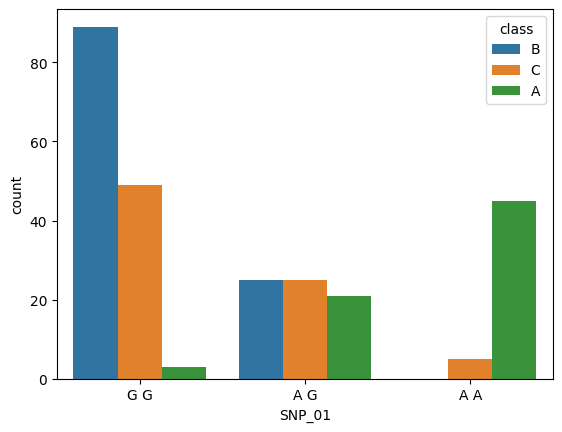

In [ ]:
df['SNP_02']
df.iloc[:,5] #snp_01=5 snp_15=19
#sns.countplot(df,x=df['SNP_01'], hue=df['class'])
sns.countplot(df,x=df.iloc[:,5], hue=df['class']) #같은 의미

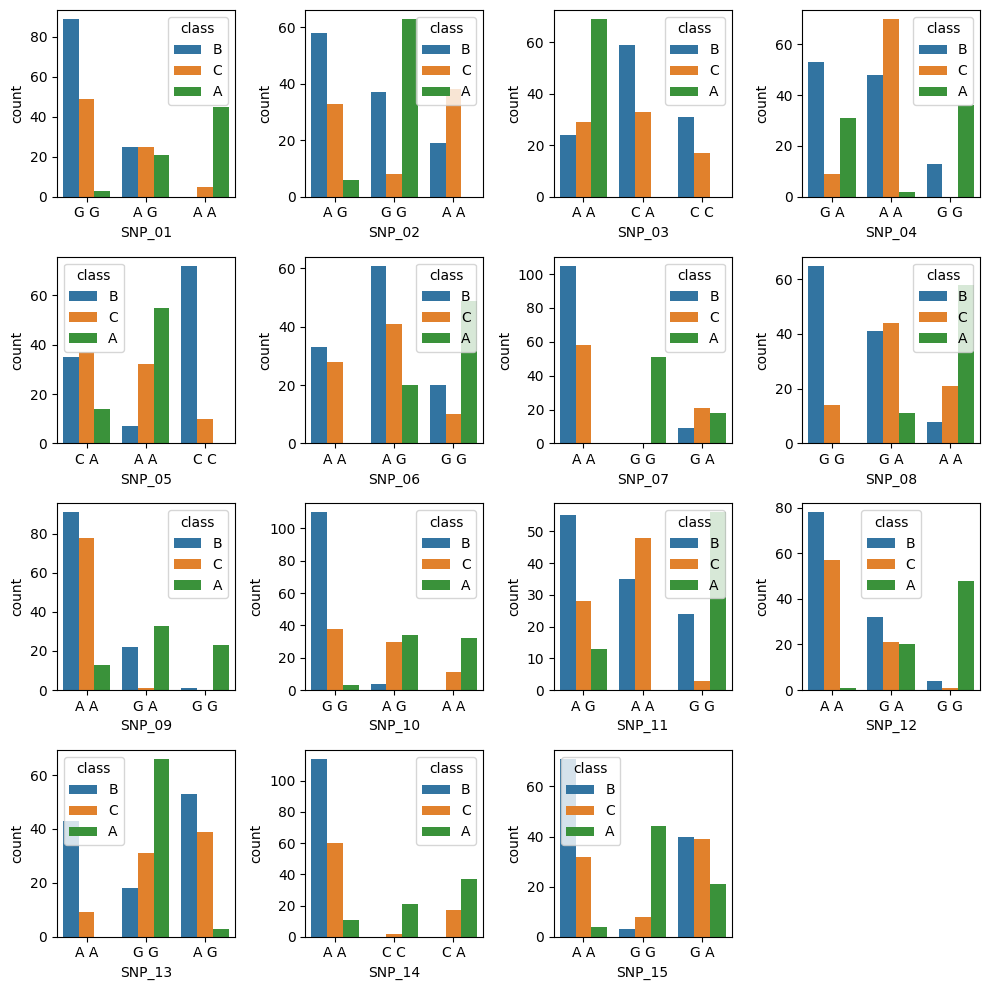

In [ ]:
#for문
fig = plt.figure(figsize=(10,10))
#plt.figure(figsize=(10,5))
for i in range(1,16):
  #print(i)
  ax = fig.add_subplot(4, 4, i)
  sns.countplot(df,x=df.iloc[:,i+4], hue=df['class'])
fig.tight_layout()
plt.show()

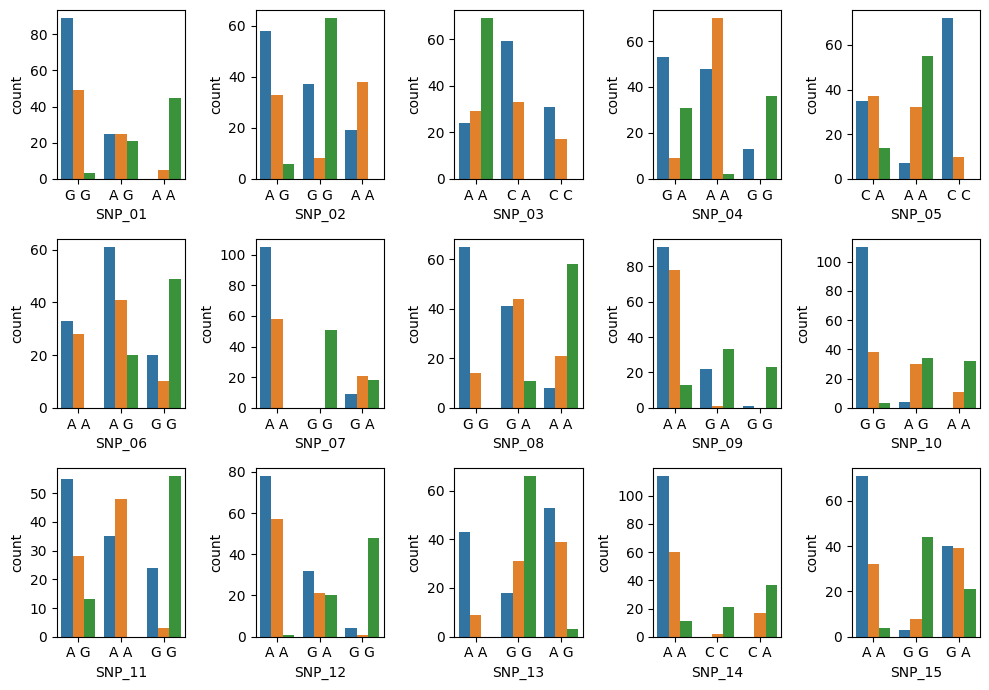

In [ ]:
#범례를 하나만 나오도록-범례 없애주기 새로 범례 추가해주기
#ax.get_legend().remove()
fig = plt.figure(figsize=(10,7))
#plt.figure(figsize=(10,5))
for i in range(1,16):
  #print(i)
  ax = fig.add_subplot(3, 5, i)
  sns.countplot(df,x=df.iloc[:,i+4], hue=df['class']).get_legend().remove() #범례 삭제
fig.tight_layout()
plt.show()

## snp info (for 시각화)

In [ ]:
#snp info
# chrom 2 : SNP_01
# chrom 6 : SNP_02~09
# chrom 7 : SNP_10
# chrom 8 : SNP_11
# chrom 9 : SNP_12~14
# chrom 10 : SNP_15
df_snp=pd.read_csv('/content/drive/MyDrive/개인프로젝트/projectdata/유전체 정보 품종 분류 AI 경진대회/snp_info.csv')
df_snp

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [ ]:
df_snp['chrom'].value_counts()

6     8
9     3
2     1
7     1
8     1
10    1
Name: chrom, dtype: int64

In [ ]:
df_snp['SNP_id'].value_counts()

SNP_01    1
SNP_02    1
SNP_03    1
SNP_04    1
SNP_05    1
SNP_06    1
SNP_07    1
SNP_08    1
SNP_09    1
SNP_10    1
SNP_11    1
SNP_12    1
SNP_13    1
SNP_14    1
SNP_15    1
Name: SNP_id, dtype: int64

In [ ]:
df_snp#train2의 의미 #train2=chrome2맞는지

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [ ]:
df.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

## 레이블인코딩

In [ ]:
df_le = df.copy()
df_le

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [ ]:
df.columns[5:]

Index(['SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07',
       'SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14',
       'SNP_15', 'class'],
      dtype='object')

In [ ]:
#레이블인코딩 class A=0,B=1,C=2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns[5:]:
  df_le[col] = le.fit_transform(df[col])
#df.chd=le.fit_transform(df.chd)
df_le.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,2,1,0,1,1,...,0,2,0,2,1,0,0,0,0,1
1,TRAIN_001,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,1,2,0,0,2
2,TRAIN_002,0,0,0,2,2,2,0,1,2,...,0,1,1,1,0,0,0,0,0,1
3,TRAIN_003,0,0,0,1,0,2,0,1,0,...,2,0,2,1,2,2,2,0,2,0
4,TRAIN_004,0,0,0,2,2,2,2,0,2,...,0,0,0,2,0,0,1,0,1,2


In [ ]:
#스케일링 일치 확인
# plt.boxplot(x)
# plt.show()

### target feature와 features간의 상관관계 보기

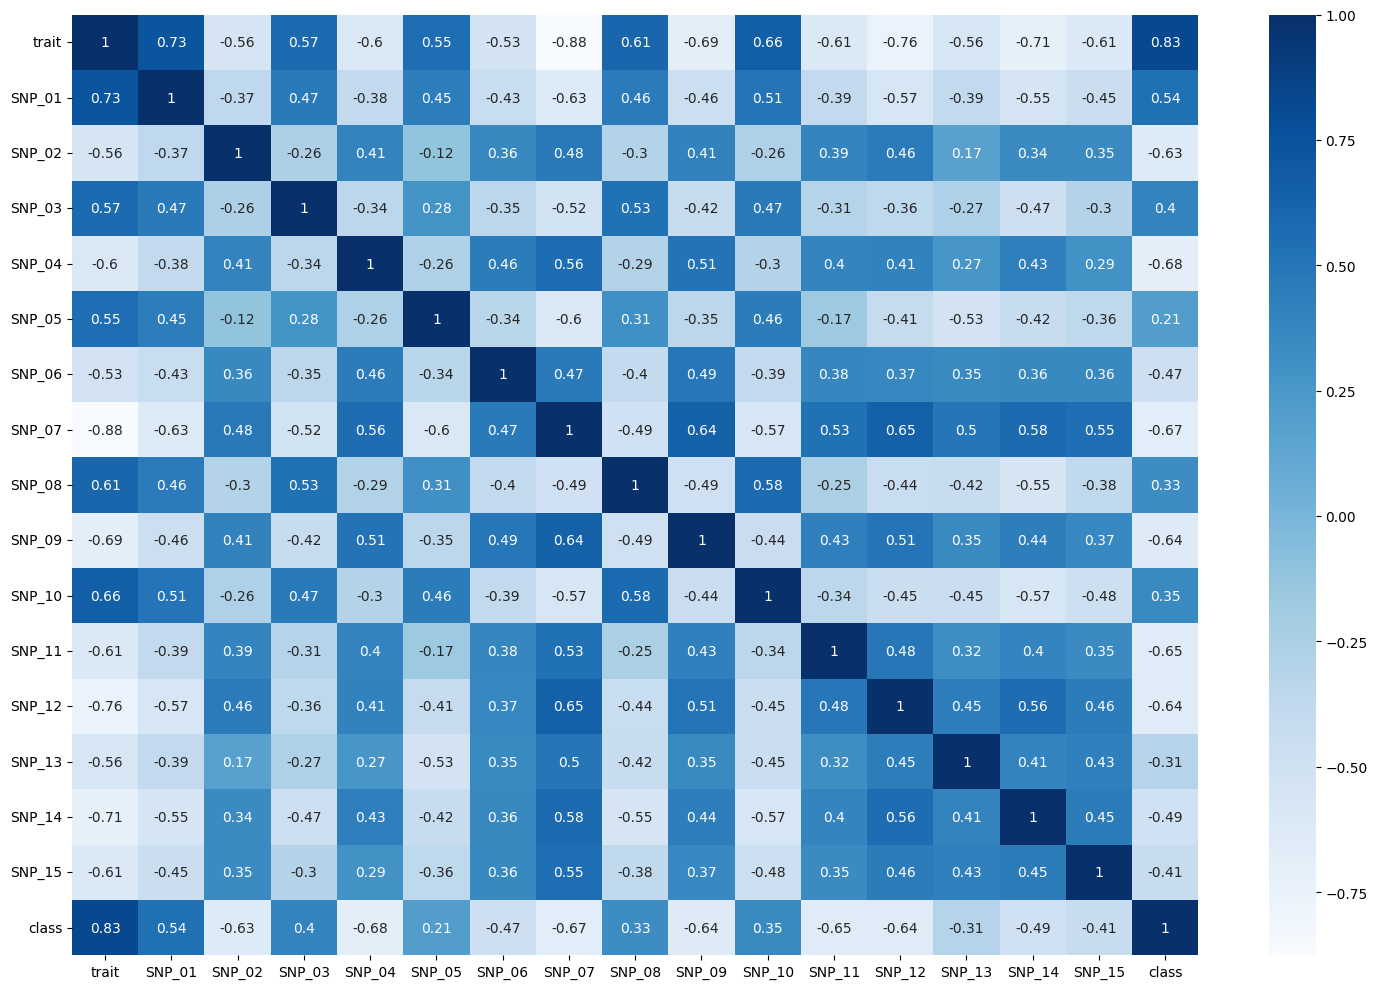

In [ ]:
df_corr = df_le.drop(['id','father','mother','gender'],axis=1)
plt.figure(figsize = (15, 10))
sns.heatmap(df_corr.corr(), annot= True, cmap='Blues')
plt.tight_layout()

In [ ]:
# feature 와 target feature나누기
y=df_le['class']
x=df_le.drop(['id','father','mother','gender','class'],axis=1)

In [ ]:
x.head(2)

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,2,1,0,1,1,0,0,2,0,2,1,0,0,0,0
1,2,1,1,1,0,0,1,0,1,0,1,0,1,2,0,0


In [ ]:
#리샘플링(나중에 추가해주기)-abc class균등하게 만들어주기 정확도 보고 해주기'
#110에 70이라 고민

In [ ]:
#훈련데이터 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)

# 모델링

In [ ]:
#svm채택
#루프를 돌려서 한꺼번에 모델을 돌림
# LDA, CART, kNN, SVM, RF. 5개 모델 구축
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), LinearDiscriminantAnalysis(),KNeighborsClassifier(),SVC()]
f1 = []
cvs = []
m=['lr','dt','rf','lda','knn','svm']
for model in models:
    model.fit(x_train, y_train)
    f1.append(model.score(x_test, y_test))
    cvs.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))
cross=pd.DataFrame(cvs,index=m)
#모델 비교
comparison = pd.concat([cross.mean(axis=1), cross.std(axis=1)], axis=1)
comparison.columns = ['accuracy', 'stds'] #crossvalidation해서 구해낸 accuracy들의 평균값
comparison['f1score']=f1
print(cross)
print(comparison)

       0      1      2      3    4      5      6      7      8         9
lr   1.0  0.750  0.750  0.875  1.0  0.875  0.875  1.000  1.000  0.857143
dt   1.0  0.875  0.875  0.625  1.0  0.750  1.000  0.875  0.875  0.714286
rf   1.0  0.750  0.875  0.875  1.0  0.750  0.875  1.000  1.000  0.857143
lda  1.0  0.875  0.875  0.875  1.0  0.875  0.875  1.000  1.000  0.857143
knn  1.0  0.875  0.875  0.875  1.0  1.000  0.875  1.000  1.000  0.714286
svm  1.0  0.875  0.875  0.875  1.0  0.875  0.875  1.000  1.000  0.857143
     accuracy      stds   f1score
lr   0.898214  0.099264  0.898734
dt   0.858929  0.128342  0.898734
rf   0.898214  0.099264  0.898734
lda  0.923214  0.066310  0.911392
knn  0.921429  0.095683  0.886076
svm  0.923214  0.066310  0.924051


In [ ]:
comparison

,accuracy,stds,f1score
lr,0.898214,0.099264,0.898734
dt,0.858929,0.128342,0.898734
rf,0.898214,0.099264,0.898734
lda,0.923214,0.066310,0.911392
knn,0.921429,0.095683,0.886076
svm,0.923214,0.066310,0.924051


<Axes: ylabel='accuracy'>

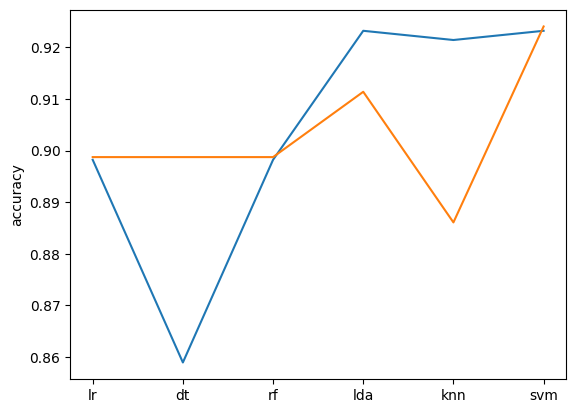

In [ ]:
#모델 성능 비교
#accuracy와 f1score가 높은 svm모델을 채택
sns.lineplot(comparison,x=comparison.index, y = comparison['accuracy'])
#sns.lineplot(comparison,x=comparison.index, y = comparison['stds'])
sns.lineplot(comparison,x=comparison.index, y = comparison['f1score'])

In [ ]:
#forchart데이터프레임만들기
bar = pd.DataFrame({'model':['lr', 'lr','dt', 'dt', 'rf',' rf', 'lda', 'lda', 'knn', 'knn', 'svm','svm'],
                    'accuracy':[0.898214, 0.898734, 0.858929, 0.911392, 0.898214, 0.898734, 0.923214, 0.911392, 0.921429, 0.886076, 0.923214, 0.924051],
                    'evaluation':['Accuracy', 'F1 score', 'Accuracy', 'F1 score', 'Accuracy', 'F1 score', 'Accuracy', 'F1 score', 'Accuracy', 'F1 score', 'Accuracy', 'F1 score']})

<Axes: xlabel='model', ylabel='accuracy'>

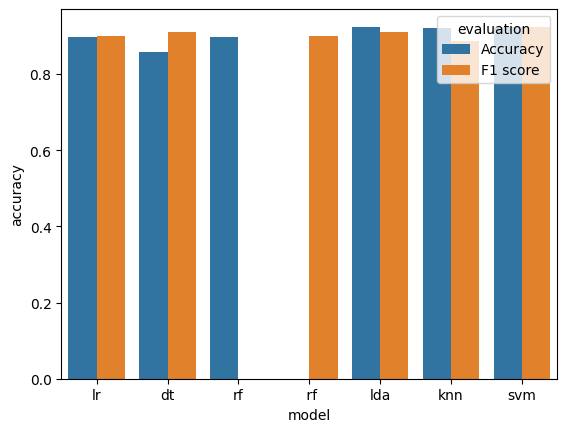

In [ ]:
#차이가 두드러지지 않아 lineplot으로
sns.barplot(bar, x="model", y="accuracy", hue="evaluation")

<Axes: xlabel='model', ylabel='accuracy'>

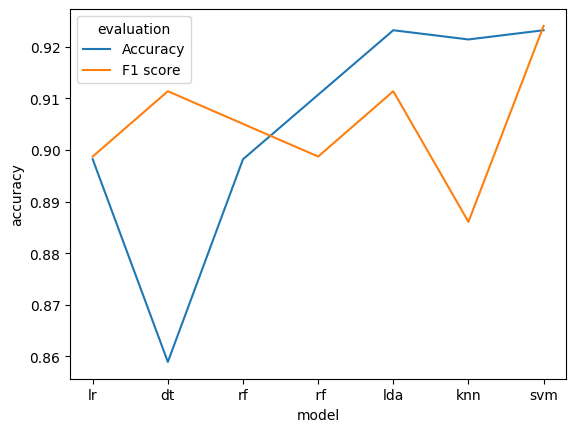

In [ ]:
sns.lineplot(bar, x="model", y="accuracy", hue="evaluation")

### score와 f1score비교

In [ ]:
#score = f1score
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)#0.9240506329113924

cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy')
#array([1.        , 0.875     , 0.875     , 0.875     , 1.        ,
#       0.875     , 0.875     , 1.        , 1.        , 0.85714286])
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),average = "micro") #0.9240506329113924

print('score :', model.score(x_test, y_test))==print('f1 score : ',f1_score(y_test,model.predict(x_test),average = "micro"))


score : 0.9240506329113924
f1 score :  0.9240506329113924


True

In [ ]:
#RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)#0.9240506329113924

cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy')
#array([1.        , 0.875     , 0.875     , 0.875     , 1.        ,
#       0.875     , 0.875     , 1.        , 1.        , 0.85714286])
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),average = "micro") #0.9240506329113924

print('score :', model.score(x_test, y_test))==print('f1 score : ',f1_score(y_test,model.predict(x_test),average = "micro"))


score : 0.9240506329113924
f1 score :  0.9240506329113924


True

#모델평가
- Confusion Matrix
- Classification Report
- Accuracy = TP+TN/P+N
- Recall재현율 = TP/TP+FN
- Precision정밀도 = TP/TP+FP

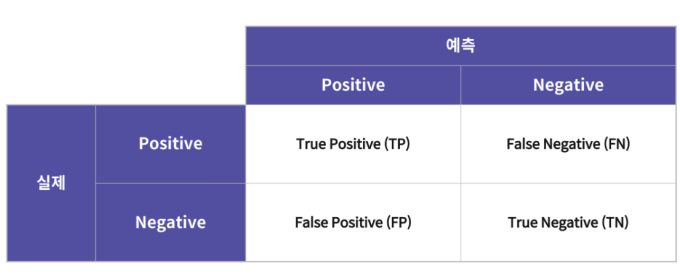

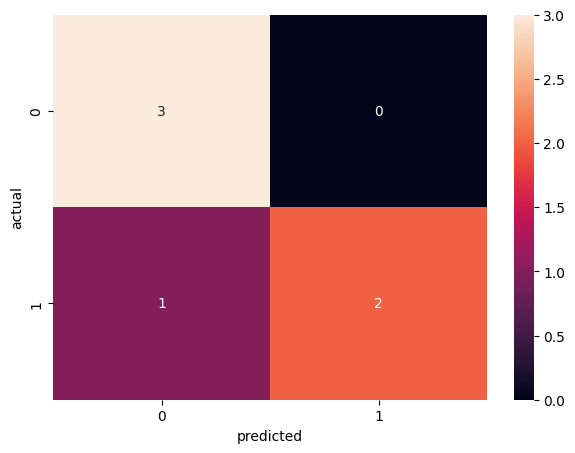

In [ ]:
#y_test.shape
#model.predict(x_test)
a=[0,0,0,1,1,1] #실제값
b=[0,0,0,1,0,1]# 예측값
#HEATMAP은 Y축부터
plt.rcParams['figure.figsize'] = [7, 5] # [width, height] (inches)
#ax = fig.add_subplot(1, 1, 1) #엑스와이축 그룹으로 이름 변경 위해
sns.heatmap(confusion_matrix(a, b), annot=True,fmt='g')#,cmap='Blues')

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#print(classification_report(y_test, model.predict(x_test)))

### Class C의 Recall값이 낮다
### = 실제 Class C인 것에서 모델이 Class C를 예측할 확률이 낮은 편이다

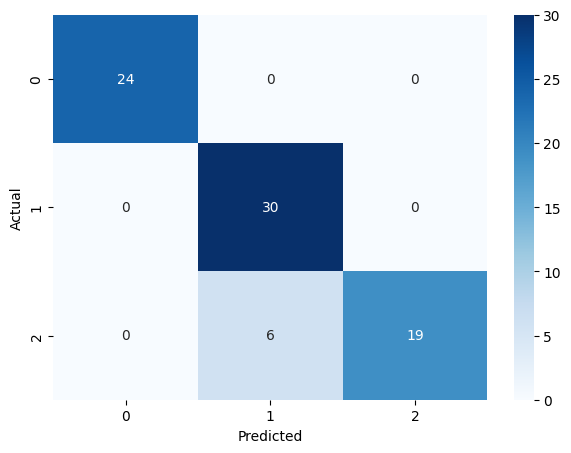

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.83      1.00      0.91        30
           2       1.00      0.76      0.86        25

    accuracy                           0.92        79
   macro avg       0.94      0.92      0.92        79
weighted avg       0.94      0.92      0.92        79



In [ ]:
#Confusion Matrix
plt.rcParams['figure.figsize'] = [7, 5] # [width, height] (inches)
hd=sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True,fmt='g',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#분류리포트
#레이블인코딩 class A=0,B=1,C=2
#Precision : TP/TP+FP
#Recall : TP/TP+FN
print(classification_report(y_test, model.predict(x_test)))

# 예측

In [ ]:
random_pred = df.sample(5,random_state=40)
random_pred

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
189,TRAIN_189,0,0,0,2,G G,A A,C A,A A,A A,...,A A,G A,A A,A G,A A,A A,A G,A A,A A,C
86,TRAIN_086,0,0,0,2,G G,A A,C A,A A,C C,...,A A,A A,A A,A A,A G,A A,A A,C C,A A,C
37,TRAIN_037,0,0,0,1,A A,G G,A A,G A,A A,...,G G,G A,A A,A A,G G,G G,G G,C A,G G,A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
54,TRAIN_054,0,0,0,2,G G,A G,C A,G A,C C,...,G A,G G,A A,G G,A G,G A,A A,A A,G A,B


In [ ]:
random_pred.index

Int64Index([189, 86, 37, 3, 54], dtype='int64')

In [ ]:
#x.iloc[257,:].values.reshape(1,-1).shape
#하나만 예측
test_d = x.iloc[random_pred.index[0],:].values.reshape(1,-1)
model.predict(test_d)

array([2])

In [ ]:
#무작위 예측
pred_lst=[]
for p in random_pred.index:
    pred=model.predict(x.iloc[p,:].values.reshape(1,-1))
    pred_lst.extend(pred)
    print(pred)
print(pred_lst)

#마지막에 정렬 df.sort_index(axis=0, level=0))

[2]
[2]
[0]
[0]
[1]
[2, 2, 0, 0, 1]


In [ ]:
# +실제값+예측값
#앞 칼럼 지우기
#칼럼이름 변경 class->actual
#df=df[['','','']]원하는 칼럼순서 넣기
#정렬 sortindex
random_pred['predict']=pred_lst
random_pred

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class,predict
189,TRAIN_189,0,0,0,2,G G,A A,C A,A A,A A,...,G A,A A,A G,A A,A A,A G,A A,A A,C,2
86,TRAIN_086,0,0,0,2,G G,A A,C A,A A,C C,...,A A,A A,A A,A G,A A,A A,C C,A A,C,2
37,TRAIN_037,0,0,0,1,A A,G G,A A,G A,A A,...,G A,A A,A A,G G,G G,G G,C A,G G,A,0
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,A A,G G,A G,G G,G G,G G,A A,G G,A,0
54,TRAIN_054,0,0,0,2,G G,A G,C A,G A,C C,...,G G,A A,G G,A G,G A,A A,A A,G A,B,1


In [ ]:
random_pred.columns
random_pred = random_pred[['id', 'class', 'predict']]
random_pred

,id,class,predict
189,TRAIN_189,C,2
86,TRAIN_086,C,2
37,TRAIN_037,A,0
3,TRAIN_003,A,0
54,TRAIN_054,B,1


In [ ]:
#인버스-새 df 바로 적용 가능
random_pred['predict'] = le.inverse_transform(random_pred['predict'])
random_pred

,id,class,predict
189,TRAIN_189,C,C
86,TRAIN_086,C,C
37,TRAIN_037,A,A
3,TRAIN_003,A,A
54,TRAIN_054,B,B


In [ ]:
#칼럼명 변경
random_pred.rename(columns={'class':'actual'})

,id,actual,predict
189,TRAIN_189,C,C
86,TRAIN_086,C,C
37,TRAIN_037,A,A
3,TRAIN_003,A,A
54,TRAIN_054,B,B


In [ ]:
#인덱스정렬
random_pred.sort_index(axis=0)

,id,class,predict
3,TRAIN_003,A,A
37,TRAIN_037,A,A
54,TRAIN_054,B,B
86,TRAIN_086,C,C
189,TRAIN_189,C,C


## total value의 target 예측
- test_x 를 넣으면 test(30%)만 예측
- x를 넣으면 전체를 예측(데이콘,캐글 정답파일)

In [ ]:
df['predict'] = model.predict(x)
#inverse하여 원래 target name보이기 앞의 칼럼들 drop
total_pred = df[['id', 'class', 'predict']]
total_pred['predict'] = le.inverse_transform(total_pred['predict'])
total_pred = total_pred.rename(columns={'class':'actual'})
total_pred

,id,actual,predict
0,TRAIN_000,B,B
1,TRAIN_001,C,C
2,TRAIN_002,B,B
3,TRAIN_003,A,A
4,TRAIN_004,C,B
...,...,...,...
257,TRAIN_257,B,B
258,TRAIN_258,C,C
259,TRAIN_259,A,A
260,TRAIN_260,A,A


In [ ]:
#조건 불러옴 262 개 중 255개 맞춤->train test 합한 거라서 모델 훈련 확인용으론 의미없음
total_pred[total_pred['actual'] == total_pred['predict']]

,id,actual,predict
0,TRAIN_000,B,B
1,TRAIN_001,C,C
2,TRAIN_002,B,B
3,TRAIN_003,A,A
5,TRAIN_005,B,B
...,...,...,...
257,TRAIN_257,B,B
258,TRAIN_258,C,C
259,TRAIN_259,A,A
260,TRAIN_260,A,A


## test_x예측

In [ ]:
print(x.shape)
print(x_test.shape)
print(y_test.shape)

(262, 16)
(79, 16)
(79,)


In [ ]:
print(x_test.shape)

(79, 16)


### 에러발생이유 : y_test를 먼저 붙여줬기 때문에 칼럼 갯수가 늘어나서 오류가 난 것.16에서 17개가 됨.
1. 예측값 먼저 계산 후 실제값(y_test) 붙여주기
2. x_test를 다른 변수에 copy하면 실제값 먼저 concat가능


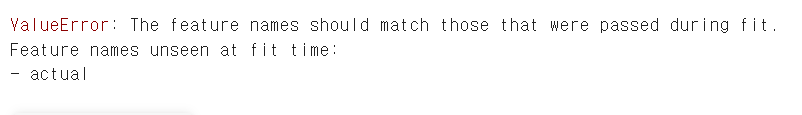

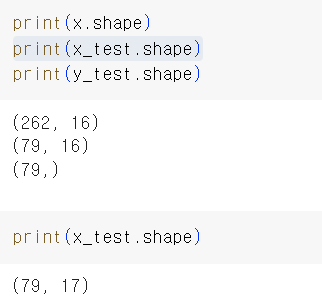

In [ ]:
test_pred=x_test.copy()
test_pred
test_pred['actual'] = y_test
test_pred['predict'] = model.predict(x_test)

test_pred = test_pred[['actual', 'predict']]
test_pred

,actual,predict
258,2,2
12,2,2
118,2,2
67,0,0
236,1,1
...,...,...
253,0,0
69,2,2
180,0,0
114,1,1


### 총79 개 의 test data 중 71개 예측 성공

In [ ]:
#총79 개 의 test data 중 71개 예측 성공
test_pred[test_pred['actual'] == test_pred['predict']]

,actual,predict
258,2,2
12,2,2
118,2,2
67,0,0
236,1,1
...,...,...
253,0,0
69,2,2
180,0,0
114,1,1


# submission.csv 예측하기

In [ ]:
#test.csv파일을 train.csv파일처럼 처리해주고 인덱스와 예측값만 남기기
#전처리, 레이블인코딩 한 것 을 리인버스 하며  target feature 이름으로 변경해주기